## Kaggle competition nlp-getting-started: Classifying disasters
 - kaggle nlp-getting-started data
 - collection of tweets

In [1]:
import os
os.chdir('nlp-getting-started')

In [4]:
from zipfile import ZipFile
file_name = "nlp-getting-started.zip"
with ZipFile(file_name, 'r') as z:
    z.printdir()
    z.extractall()

File Name                                             Modified             Size
sample_submission.csv                          2019-12-16 20:36:22        22746
test.csv                                       2019-12-16 20:36:22       420783
train.csv                                      2019-12-16 20:36:22       987712


In [155]:
import numpy as np
import pandas as pd

nlp_df = pd.read_csv('train.csv')

## Data Dictionary
- **id** - a unique identifier for each tweet
- **text** - the text of the tweet
- **location** - the location the tweet was sent from (may be blank)
- **keyword** - a particular keyword from the tweet (may be blank)
- **target** - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

## EDA

In [5]:
nlp_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [67]:
nlp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


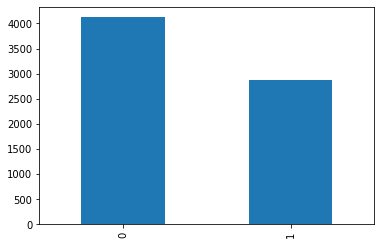

In [195]:
nlp_df.target.value_counts().plot(kind='bar');

In [196]:
nlp_df[nlp_df.target==0].head(10)

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0
20,31,NaN,NaN,this is ridiculous....,0
21,32,NaN,NaN,London is cool ;),0
22,33,NaN,NaN,Love skiing,0
23,34,NaN,NaN,What a wonderful day!,0
24,36,NaN,NaN,LOOOOOOL,0


## Text column
- some things to take into account:
    - text length
    - duplicate tweets due to retweets etc
        - may affect frequencies for algorithm
    - twitter links
    - hashtags indicating sentiment
    

In [156]:
nlp_df.shape[0]

7613

In [157]:
#remove duplicates
nlp_df.drop_duplicates(subset='text', keep = 'first', inplace = True)
nlp_df.shape[0]

7503

- not all duplicate tweets were removed
- http links in the tweet may make it unique even though the content is identical as seen below

In [175]:
#duplicate
test = nlp_df[nlp_df.location=='Mumbai'].text.tolist()[-9:]
test

["Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/SfAKQNveta",
 "Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/v5Ogr3F5N9",
 "Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/4sf0rgn8Wo",
 "Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/leDmVEZCoL",
 "Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/DtFSWNJZIL",
 "Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/2Jr3Yo55dr",
 "Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/KuKmAL605a",
 "Wreckage 'C

In [171]:
#Tweets containing http links of the tweet
nlp_df[nlp_df.text.str.contains('http://t.co/.*')==True]

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1
...,...,...,...,...,...
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1
7604,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1


- half the entries contain http links
- http links usually appear at the beginning or end of the tweet
- follow same format 'http://t.co/~

In [185]:
#Regex substitution
import re
nlp_df2 = nlp_df.copy()
nlp_df.text = [re.sub(r'http\S+', '', x) for x in nlp_df.text]

In [17]:
#before
nlp_df[nlp_df.location=='New York'].text.tolist()[:10]

['INFANTRY Mens Lume Dial Army Analog Quartz Wrist Watch Sport Blue Nylon Fabric  - Full rea\x89Û_ http://t.co/hEP9k0XgHb http://t.co/80EBvglmrA',
 'WWI WWII JAPANESE ARMY NAVY MILITARY JAPAN LEATHER WATCH WAR MIDO WW1 2 - Full read by eBay http://t.co/F9j3l2Yjl4 http://t.co/mwwWOWCayO',
 'WWI WWII JAPANESE ARMY NAVY MILITARY JAPAN LEATHER WATCH WAR MIDO WW1 2 - Full read by eBay http://t.co/QUmcE7W2tY http://t.co/KTKG2sDhHl',
 'Arsonist Sets NYC Vegetarian Restaurant on Fire: Police #NewYork - http://t.co/Nr7usT3uh8',
 'STAR WARS POWER OF THE JEDI COLLECTION 1 BATTLE DROID HASBRO - Full read by eBay http://t.co/xFguklrlTf http://t.co/FeGu8hWMc4',
 'STAR WARS POWER OF THE JEDI COLLECTION 1 BATTLE DROID HASBRO - Full read by eBay http://t.co/yI30ZgiZsW http://t.co/2jGVhw7YZs',
 "#NowPlaying at #orchardalley in #LES of #nyc 'bioterror- manufactured fear and state repression' @abcnorio #gardens http://t.co/Ba2rRXUgsG",
 'Morgan Silver Dollar 1880 S Gem BU DMPL Cameo Rev Blazing MS+++++ Hi

In [187]:
#after
nlp_df[nlp_df.location=='New York'].text.tolist()[:10]

['INFANTRY Mens Lume Dial Army Analog Quartz Wrist Watch Sport Blue Nylon Fabric  - Full rea\x89Û_  ',
 'WWI WWII JAPANESE ARMY NAVY MILITARY JAPAN LEATHER WATCH WAR MIDO WW1 2 - Full read by eBay  ',
 'WWI WWII JAPANESE ARMY NAVY MILITARY JAPAN LEATHER WATCH WAR MIDO WW1 2 - Full read by eBay  ',
 'Arsonist Sets NYC Vegetarian Restaurant on Fire: Police #NewYork - ',
 'STAR WARS POWER OF THE JEDI COLLECTION 1 BATTLE DROID HASBRO - Full read by eBay  ',
 'STAR WARS POWER OF THE JEDI COLLECTION 1 BATTLE DROID HASBRO - Full read by eBay  ',
 "#NowPlaying at #orchardalley in #LES of #nyc 'bioterror- manufactured fear and state repression' @abcnorio #gardens ",
 'Morgan Silver Dollar 1880 S Gem BU DMPL Cameo Rev Blazing MS+++++ High grade! - Full read \x89Û_  ',
 'Morgan Silver Dollar 1921 P CH Gem Bu PL Blazing MS++++++ Satin Rare Proof Like! - Full re\x89Û_  ',
 'New Ladies Shoulder Tote Handbag Women Cross Body Bag Faux Leather Fashion Purse - Full re\x89Û_  ']

In [182]:
#before
nlp_df[nlp_df.location=='Canada'].text.tolist()[:10]

['DTN Brazil: Experts in France begin examining airplane debris found on Reunion Island: French air accident exp... http://t.co/M9IG3WQ8Lq',
 "\x89ÛÏ@LeoBlakeCarter: This dog thinks he's an ambulance ?????? http://t.co/MG1lpGr0RM\x89Û\x9d@natasha_rideout",
 "@ENews Ben Affleck......I know there's a wife/kids and other girls but I can't help it. I've loved him since Armageddon #eonlinechat",
 "What a feat! Watch the #BTS of @kallemattson's incredible music video for #Avalanche: https://t.co/3W6seA9tuv ????",
 'Blizzard of Auz @ 9 pm CST @RadioRiffRocks / http://t.co/pjLDA9HD5v    2 hrs of Rock to make your hump day complete! http://t.co/3wNjaUaR7w',
 '@CranBoonitz So going to make any bomb threats? @HereticOfEthics',
 'Sure - take them away from fire fighting for King Stevie &amp; Crusty to have a photo-op ! http://t.co/epeX4axG4b',
 "We're #hiring in our Toronto branch! Surety Underwriter/Senior Underwriter and Casualty Product Leader. Apply today. http://t.co/PraMKlrMhz",
 "@Flunkie i

In [188]:
#After
nlp_df[nlp_df.location=='Canada'].text.tolist()[:10]

['DTN Brazil: Experts in France begin examining airplane debris found on Reunion Island: French air accident exp... ',
 "\x89ÛÏ@LeoBlakeCarter: This dog thinks he's an ambulance ?????? ",
 "@ENews Ben Affleck......I know there's a wife/kids and other girls but I can't help it. I've loved him since Armageddon #eonlinechat",
 "What a feat! Watch the #BTS of @kallemattson's incredible music video for #Avalanche:  ????",
 'Blizzard of Auz @ 9 pm CST @RadioRiffRocks /     2 hrs of Rock to make your hump day complete! ',
 '@CranBoonitz So going to make any bomb threats? @HereticOfEthics',
 'Sure - take them away from fire fighting for King Stevie &amp; Crusty to have a photo-op ! ',
 "We're #hiring in our Toronto branch! Surety Underwriter/Senior Underwriter and Casualty Product Leader. Apply today. ",
 "@Flunkie if it makes you feel any better I'm level 32 and still get demolished.",
 'Real people. True stories. Real pain &amp; suffering. #displaced #RefugeesMatter #Syria  ']

In [143]:
#before
nlp_df[nlp_df.location=='Mumbai'].text.tolist()

['If I get run over by an ambulance am I lucky? #justsaying #randomthought',
 'India shud not give any evidence 2 pak.They will share with terrorists &amp; use for next attack.Share with oth contries https://t.co/qioPbTIUVu',
 '@ameenshaikh3 by ur. logic if bridge didnt collapse then second train engine should cross bridge then  @sanjaynirupam @sureshprabhu',
 '@ameenshaikh3 sir i just only wanted to make a point about @sureshpprabhu you made and said he is lying about bridge collapse.',
 '16 dead in Russia bus accident: At least 16 people were killed and 26 others injured when two buses collided i... http://t.co/ybyP68ieVn',
 'ThisIsFaz: Anti Collision Rear- #technology #cool http://t.co/KEfxTjTAKB Via Techesback #Tech',
 'MP trains derailment: \x89Û÷It\x89Ûªs the freakiest of freak accidents\x89Ûª: \n\nMP trains derailment: \x89Û÷It\x89Ûªs the freakiest of ... http://t.co/uHXODSc7Wi',
 "Latest : Trains derailment: 'It's the freakiest of freak accidents' - The Indian Express: The Indi

In [189]:
#after removing http
nlp_df[nlp_df.location=='Mumbai'].text.tolist()

['If I get run over by an ambulance am I lucky? #justsaying #randomthought',
 'India shud not give any evidence 2 pak.They will share with terrorists &amp; use for next attack.Share with oth contries ',
 '@ameenshaikh3 by ur. logic if bridge didnt collapse then second train engine should cross bridge then  @sanjaynirupam @sureshprabhu',
 '@ameenshaikh3 sir i just only wanted to make a point about @sureshpprabhu you made and said he is lying about bridge collapse.',
 '16 dead in Russia bus accident: At least 16 people were killed and 26 others injured when two buses collided i... ',
 'ThisIsFaz: Anti Collision Rear- #technology #cool  Via Techesback #Tech',
 'MP trains derailment: \x89Û÷It\x89Ûªs the freakiest of freak accidents\x89Ûª: \n\nMP trains derailment: \x89Û÷It\x89Ûªs the freakiest of ... ',
 "Latest : Trains derailment: 'It's the freakiest of freak accidents' - The Indian Express: The Indi...  #IndianNews",
 'Mumbai24x7 Helping Hand: In Mumbai 2 TTEs take charge of helpline to

Now, duplicates can be removed

In [190]:
nlp_df.shape[0]

7503

In [191]:
nlp_df.drop_duplicates(subset='text', keep = 'first', inplace = True)
nlp_df.shape[0]

6989

In [192]:
#after removing duplicates
nlp_df[nlp_df.location=='Mumbai'].text.tolist()

['If I get run over by an ambulance am I lucky? #justsaying #randomthought',
 'India shud not give any evidence 2 pak.They will share with terrorists &amp; use for next attack.Share with oth contries ',
 '@ameenshaikh3 by ur. logic if bridge didnt collapse then second train engine should cross bridge then  @sanjaynirupam @sureshprabhu',
 '@ameenshaikh3 sir i just only wanted to make a point about @sureshpprabhu you made and said he is lying about bridge collapse.',
 'ThisIsFaz: Anti Collision Rear- #technology #cool  Via Techesback #Tech',
 'MP trains derailment: \x89Û÷It\x89Ûªs the freakiest of freak accidents\x89Ûª: \n\nMP trains derailment: \x89Û÷It\x89Ûªs the freakiest of ... ',
 "Latest : Trains derailment: 'It's the freakiest of freak accidents' - The Indian Express: The Indi...  #IndianNews",
 'Mumbai24x7 Helping Hand: In Mumbai 2 TTEs take charge of helpline to calm anxious relatives - The Ind...  #Mumbai',
 'Udhampur terror attack: Militants attack police post 2 SPOs injured: 

## Text tweet lengths
- feature generation

In [218]:
nlp_df['text_length'] = nlp_df.text.str.len()

In [221]:
nlp_df = nlp_df[['id','keyword','location','text','text_length','target']]

In [222]:
nlp_df

,id,keyword,location,text,text_length,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,1
...,...,...,...,...,...,...
7602,10860,NaN,NaN,a siren just went off and it wasn't the Forney...,65,1
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,114,1
7604,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,114,1
7605,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,114,1


In [229]:
pos_df = nlp_df[nlp_df.target==1]
neg_df = nlp_df[nlp_df.target==0]
pos_df.shape[0], neg_df.shape[0]

(2867, 4122)

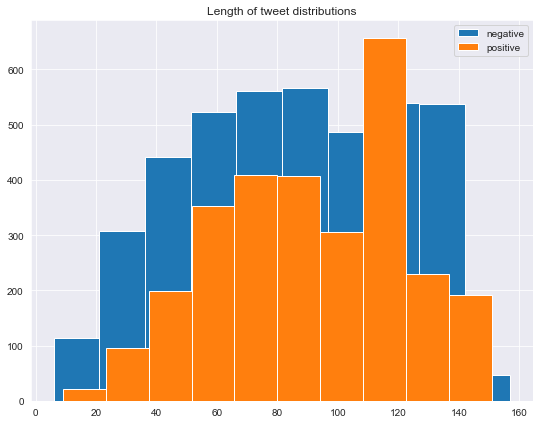

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (9,7)

neg_df.text_length.hist();
pos_df.text_length.hist();
plt.legend([
    'negative',
    'positive'
])
plt.title('Length of tweet distributions');

In [259]:
print('Positive:\n', pos_df.text_length.describe(),'\n\nNegative:\n', neg_df.text_length.describe())

Positive:
 count    2867.000000
mean       91.146146
std        30.387012
min         9.000000
25%        67.000000
50%        93.000000
75%       115.000000
max       151.000000
Name: text_length, dtype: float64 

Negative:
 count    4122.000000
mean       84.276565
std        34.721189
min         6.000000
25%        57.000000
50%        85.000000
75%       114.000000
max       157.000000
Name: text_length, dtype: float64


### Keywords 

In [260]:
nlp_df.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

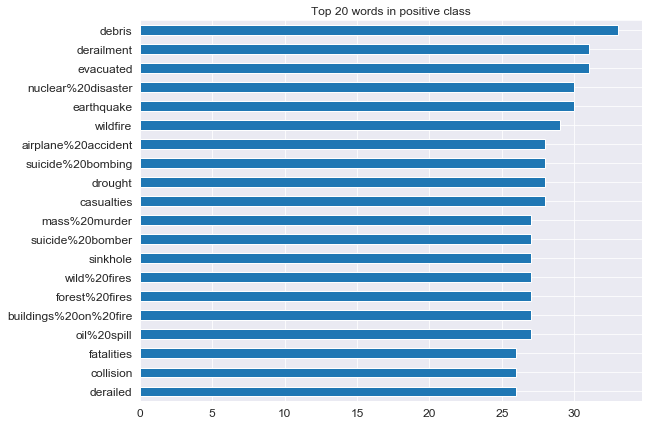

In [305]:
def create_barh(df, case, title=None, x=0, y=20, color='#1f77b4'):
    df[case].value_counts()[x:y].plot(kind='barh', title=title, fontsize=12, color=color).invert_yaxis()

create_barh(pos_df, 'keyword', title='Top 20 words in positive class')

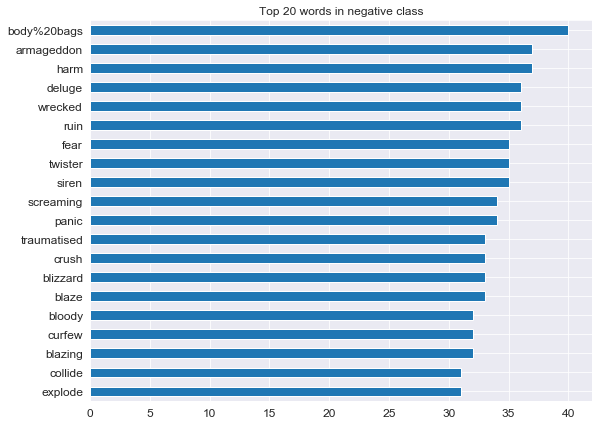

In [306]:
#negative target
create_barh(neg_df, 'keyword', title='Top 20 words in negative class')

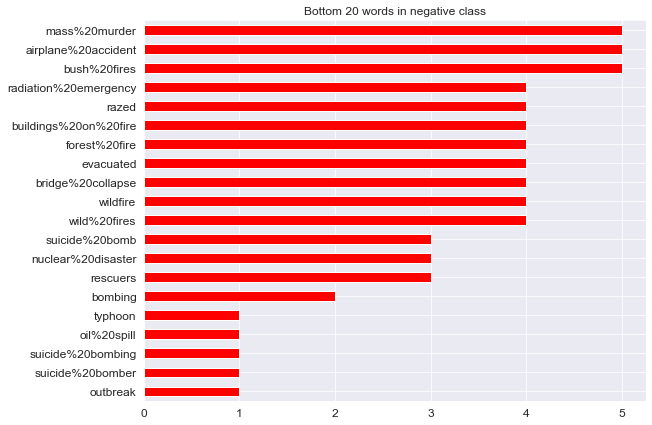

In [318]:
create_barh(neg_df, 'keyword', x=-20, y=None, color='r', title='Bottom 20 words in negative class')

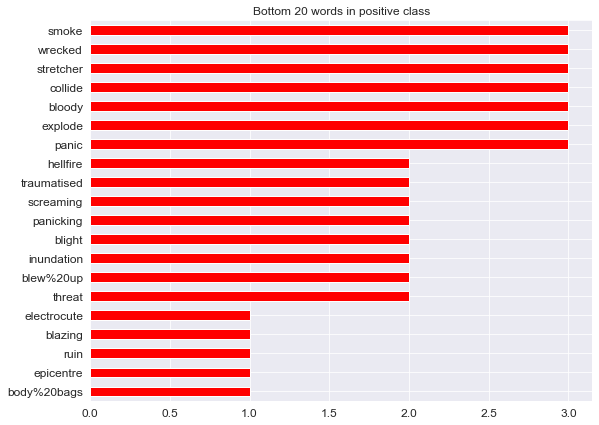

In [320]:
create_barh(pos_df, 'keyword', x=-20, y=None, color='r', title='Bottom 20 words in positive class')

In [281]:
shared_keywords = [x for x in neg_df.keyword.unique() if x in pos_df.keyword.unique()]

In [282]:
len(shared_keywords)/len(pos_df.keyword.unique())

0.9818181818181818

- most keywords are shared between both target classes
- top keywords of each class are inversely related to eachother (ie Positive top 20 is similar to negative bottom 20)

In [283]:
#Probability
plist = pos_df.keyword.values.tolist()
nlist = neg_df.keyword.values.tolist()

def ratios(x):
    return round(plist.count(x)/(nlist.count(x)+plist.count(x)), 3)

keyword_probs = [(ratios(x), x) for x
       in nlp_df.keyword.unique() 
       if x in neg_df.keyword.unique() and x in pos_df.keyword.unique()]

In [284]:
#of these keywords, what is the likelihood the tweet is classified as a disaster tweet?
keyword_list = sorted(keyword_probs, reverse=True)
keyword_list[:20]

[(0.966, 'suicide%20bombing'),
 (0.964, 'suicide%20bomber'),
 (0.964, 'oil%20spill'),
 (0.957, 'typhoon'),
 (0.952, 'outbreak'),
 (0.917, 'bombing'),
 (0.909, 'nuclear%20disaster'),
 (0.886, 'evacuated'),
 (0.879, 'wildfire'),
 (0.871, 'wild%20fires'),
 (0.871, 'buildings%20on%20fire'),
 (0.87, 'rescuers'),
 (0.857, 'suicide%20bomb'),
 (0.852, 'bridge%20collapse'),
 (0.848, 'airplane%20accident'),
 (0.844, 'mass%20murder'),
 (0.844, 'forest%20fires'),
 (0.8, 'drought'),
 (0.8, 'casualties'),
 (0.788, 'evacuation')]

In [285]:
keyword_list[-20:]

[(0.098, 'harm'),
 (0.097, 'stretcher'),
 (0.094, 'drown'),
 (0.088, 'smoke'),
 (0.088, 'explode'),
 (0.088, 'collide'),
 (0.086, 'bloody'),
 (0.083, 'epicentre'),
 (0.081, 'panic'),
 (0.08, 'hellfire'),
 (0.077, 'wrecked'),
 (0.065, 'panicking'),
 (0.062, 'blight'),
 (0.061, 'blew%20up'),
 (0.057, 'traumatised'),
 (0.056, 'screaming'),
 (0.032, 'electrocute'),
 (0.03, 'blazing'),
 (0.027, 'ruin'),
 (0.024, 'body%20bags')]

### Location
- locations can be edited by user and is not necessarily indicative

In [286]:
nlp_df.location.unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

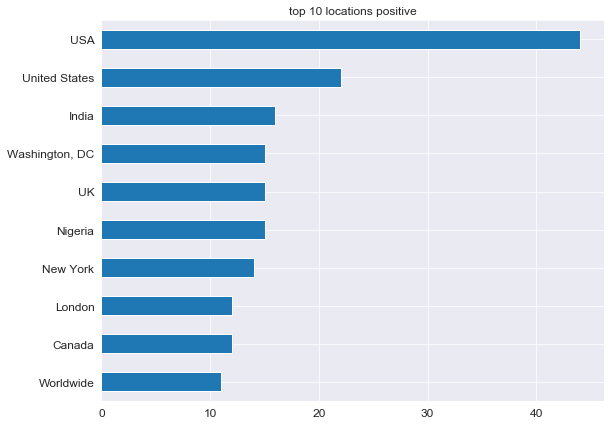

In [321]:
create_barh(pos_df, 'location', x=None, y=10, title='top 10 locations positive')

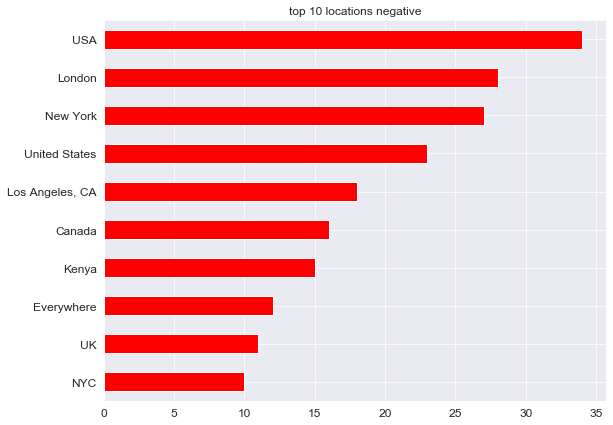

In [322]:
create_barh(neg_df, 'location', x=None, y=10, color='r', title='top 10 locations negative')

In [323]:
#Probability
plist = pos_df.location.values.tolist()
nlist = neg_df.location.values.tolist()

def ratios(x):
    return round(plist.count(x)/(nlist.count(x)+plist.count(x)), 3)

location_probs = [(ratios(x), x) for x
       in nlp_df.location.unique() 
       if x in neg_df.location.unique() and x in pos_df.location.unique()]

sorted(location_probs, reverse=True)[:20]

[(0.833, 'Oklahoma City, OK'),
 (0.8, 'WorldWide'),
 (0.8, 'US'),
 (0.8, 'Paterson, New Jersey '),
 (0.8, 'Mumbai'),
 (0.8, 'Melbourne, Australia'),
 (0.8, 'Lagos, Nigeria'),
 (0.8, 'India'),
 (0.778, 'Nashville, TN'),
 (0.75, 'The Netherlands'),
 (0.75, 'Sydney, New South Wales'),
 (0.75, 'Sydney, Australia'),
 (0.75, 'Phoenix, AZ'),
 (0.75, 'Oakland, CA'),
 (0.75, 'Nigeria'),
 (0.714, 'Washington, DC'),
 (0.714, 'Memphis, TN'),
 (0.7, 'Earth'),
 (0.692, 'Washington, D.C.'),
 (0.667, 'nyc')]

In [324]:
nlp_df[nlp_df.location=='Mumbai'][:10]

,id,keyword,location,text,text_length,target
181,260,ambulance,Mumbai,If I get run over by an ambulance am I lucky? ...,72,0
471,681,attack,Mumbai,India shud not give any evidence 2 pak.They wi...,121,1
1161,1672,bridge%20collapse,Mumbai,@ameenshaikh3 by ur. logic if bridge didnt col...,131,1
1194,1720,bridge%20collapse,Mumbai,@ameenshaikh3 sir i just only wanted to make a...,126,1
1753,2521,collision,Mumbai,ThisIsFaz: Anti Collision Rear- #technology #c...,71,0
2444,3509,derailment,Mumbai,MP trains derailment: Û÷ItÛªs the freakiest ...,124,1
2459,3527,derailment,Mumbai,Latest : Trains derailment: 'It's the freakies...,114,1
2464,3532,derailment,Mumbai,Mumbai24x7 Helping Hand: In Mumbai 2 TTEs take...,113,1
4547,6464,injured,Mumbai,Udhampur terror attack: Militants attack polic...,113,1
7505,10735,wreckage,Mumbai,Wreckage 'Conclusively Confirmed' as From MH37...,114,1


## spaCy NLP

In [32]:
import spacy
from spacy import displacy
#!python -m spacy download en_core_web_sm

In [33]:
nlp = spacy.load('en_core_web_sm')

In [56]:
def find_word(word, doc):
    return word in doc

g = [text for text in nlp_df.text.values.tolist() if find_word('disaster', text)]
g[:5]

['#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas',
 'Volunteers needed to participate in Emergency Preparedness drill simulating a bioterrorism disaster: http://t.co/NWV2RvGHf3 @HVnewsnetwork',
 "Australia's Ashes disaster - how the collapse unfolded at Trent Bridge... http://t.co/Dq3ddGvgBF\n #cricket",
 "Australia's Ashes disaster - how the collapse unfolded at Trent Bridge - Telegraph http://t.co/6FYnerMUsG",
 'Emergency responders prepare for chemical disaster through Hazmat training. http://t.co/q9zixCi8E6']

In [57]:
g = [text for text in nlp_df.text.values.tolist() if find_word('casualties', text)]
g[:5]

['That triumphant moment when you cook up two eggs over easy with no yolk casualties ?? http://t.co/fQJ5Aga1pd',
 'Another movie theater attack..close to home this time. Thankful for no casualties. Life will go on because we cannot allow evil to win!',
 'Civilian casualties rise as Afghan war intensifies in 2015-- http://t.co/NnylXhInPx',
 "Afghan conflict sees 'sharp rise' in female casualties http://t.co/4hcYwRWN6L http://t.co/2TwXZ6vxbx",
 "@LibertarianLuke I'm all for that to be honest. If people want to go on a rampage let them use their own hands and feet. No casualties."]

In [135]:
g = [text for text in nlp_df.text.values.tolist() if find_word('outbreak', text)]
g[:5]

['Bioterrorism public health superbug biolabs epidemics biosurveillance outbreaks | Homeland Security News Wire http://t.co/cvhYGwcBZv',
 "Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/02ELqLOpFk",
 "Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disease in Edinburgh are to ...",
 "Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/8lCbDW7m2z",
 "10th death confirmed in Legionnaires' outbreak in South Bronx; total cases reaches triple digits http://t.co/JtzefipdBo"]

In [65]:
doc = nlp(g[1])
displacy.render(doc)

In [69]:
nlp_df[nlp_df.text==str(g[1])] #positive

,id,keyword,location,text,target
1394,2012,casualties,NaN,Another movie theater attack..close to home th...,1


In [70]:
doc = nlp(g[2])
displacy.render(doc)

In [71]:
nlp_df[nlp_df.text==str(g[2])] #positive

,id,keyword,location,text,target
1395,2014,casualties,Philippines,Civilian casualties rise as Afghan war intensi...,1


In [72]:
nlp_df[nlp_df.text==str(g[3])]

,id,keyword,location,text,target
1396,2015,casualties,NaN,Afghan conflict sees 'sharp rise' in female ca...,1
